# Weather
********
<br>

This notebook contains a plot of the temperature over time. The data used for this plot was taken from CSV file [weatherreadings1.csv](/Users/filipecarvalho/Desktop/PFDA/assignments/weatherreadings1.csv)

This notebook is divided in two parts: `Overview of the dataset` and `Plotting the temperature over time`.

## 1. Overview of the dataset

In this section, it starts by importing all modules that will be used across the notebook, then the CSV file is read into this notebook using pandas. In a next step an insight is offerred by runing the functions `head()` and `info()`. These functions provide a better understanding of the columns of this dataset, their type of data, if any null value is present and which columns will be used for the plot.

In [60]:
# Import the appropriate modules

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.dates as mdates 


In [61]:
# Reading the CSV file

df = pd.read_csv('/Users/filipecarvalho/Desktop/PFDA/assignments/weatherreadings1.csv')

In [62]:
# Have a look at the first rows of this dataset

df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [63]:
# Confirm the data type for each column and if there is any null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

There are 4 columns informing time `reportStartDateTime`, `reportEndDateTime`, `localReportEndDateTime` and `createdDateTime`. For this assignment `reportStartDateTime` will be used as its data is the same as the other two columns related to time and shows periodic data collection throughout the rows in the dataset.

For the temperature, the `dryBulbTemperature_Celsius` was used as per assignment requirements.

## 2. Plotting the temperature over time

In this section, the aim is to visualize how temperature changes over a specific period by creating a scatter plot. Each data point represents a temperature measurement recorded at a specific time, with the x-axis displaying dates and times and the y-axis showing temperatures.

To enhance clarity, the x-axis labels are formatted to include both date and time and rotated slightly to prevent overlap. Gridlines are added to improve readability and help track the data points.

Key moments in the data, such as significant drops or increases in temperature, are highlighted using arrows and annotations. For instance, a sharp temperature decrease and a notable rise are marked with arrows and corresponding text labels. Additionally, specific data points are labeled directly with their exact temperature values to provide to enhance peaks in the temperatures before patterns in the data are changed.

### 2.1 Steps taken to complete this script

1. **Extracting Data**:  
   - The x-axis data, representing time, is converted to a datetime format using `pd.to_datetime()` to ensure proper handling and display of date-time values [1](1).  
   - The y-axis data corresponds to temperature values in Celsius.

2. **Setting Up the Plot**:  
   - A figure and axes object are created using `plt.subplots()`, allowing customization of the figure's size and enabling better organization of plot elements [2], [3].

3. **Creating the Scatter Plot**:  
   - A scatter plot is generated using `ax.scatter()`, with the data points colored tan for better visualization [12].  
   - A legend is added to the upper right corner to identify the data, utilizing the `ax.legend()` function [5].

4. **Customizing Plot Elements**:  
   - The title and axis labels are set using `ax.set_title()` and `ax.set()`, which enhance the plot's clarity and descriptive power [4].  
   - The x-axis is formatted to display date and time on separate lines using `mdates.DateFormatter()` for better readability [6].  
   - The x-axis tick labels are rotated slightly to avoid overlapping, improving the plot's visual appeal [7].

5. **Adding Gridlines**:  
   - Gridlines are added to the plot using `ax.grid()` to make it easier to trace the data points visually [8].

6. **Highlighting Key Data Points**:  
   - Two significant temperature changes are annotated directly on the plot using `plt.annotate()`.  
     - The first highlights a sharp temperature drop, and the second marks a significant rise. These annotations include arrows and custom text positions for clarity [9], [10], [13].  
     - Horizontal alignment of annotations ensures the text is centered above the points of interest [14].

7. **Labeling Specific Points**:  
   - Specific data points, identified by their indices in the dataset, are labeled with their temperature values using `plt.text()`. This adds further detail to the visualization by displaying exact values directly on the plot.

8. **Displaying the Plot**:  
   - Finally, the layout is adjusted with `plt.tight_layout()` to ensure all elements fit without overlap, and the plot is displayed [3].


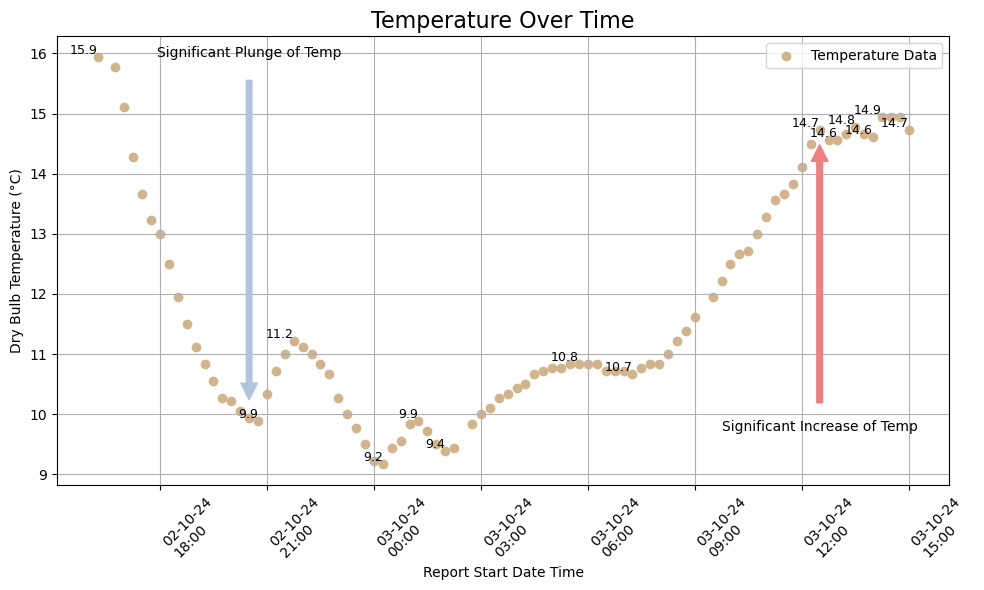

In [64]:
# Extract the required columns:
# x-axis: Convert to datetime
x = pd.to_datetime(df['reportStartDateTime'])  
# y-axis
y = df['dryBulbTemperature_Celsius']  


# Using subplots
fig, ax = plt.subplots(figsize=(10, 6))    


# Create a scatter plot
ax.scatter(x, y, color='tan', label='Temperature Data')      # added color to the dots and label.
# Positioning the legend to the upper right side of the chart
ax.legend(loc='upper right')


# Add plot elements
ax.set_title('Temperature Over Time', fontsize=16)
ax.set(xlabel='Report Start Date Time',ylabel='Dry Bulb Temperature (°C)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y\n%H:%M'))  # Date followed by time on a new line

# Add grid for better readability
ax.grid(True)

# Specific point to add a note and an arrow, 17th value.
x1 = x.iloc[16]  
y1 = y.iloc[16]
# Adding note
plt.annotate('Significant Plunge of Temp',         
            xy=(x1, y1),                         
            xytext=(x1, y1 + 6),                
            arrowprops=dict(color='lightsteelblue', shrink=0.05),
            ha='center')

# Specific point to add a note and an arrow, 79th value.
x2 = x.iloc[78]  # Used the 79th value
y2 = y.iloc[78]

# Set the text position just above the point to keep it centralized
plt.annotate('Significant Increase of Temp', 
             xy=(x2, y2), 
             xytext=(x2, y2 - 5),  # Positioning text above
             arrowprops=dict(color='lightcoral', shrink=0.05),
             horizontalalignment='center'  # Center the text horizontally
             )  

# List of indices for the points where I want to show the data labels. These were the top and down values noticed.
indices = [0, 17, 21, 31,35,38,52,58,78,80,82,84,85,88]

# Loop through the list of specific points
for i in indices:
    plt.text(x[i], y[i], f'{y[i]:.1f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Display the plot
plt.xticks(rotation=45, ha='left')  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent overlap



plt.show()

### 2.2 Analysis of the plot

The chart shows a **big drop** in temperature from **15.9°C** to **9.2°C**, followed by a **steady rise** back up to a peak of **14.9°C**. The temperature falls quickly, hitting its lowest point around midnight, where it stays between **9.2°C** and **10.8°C** for a short time. After this, the temperature starts to rise again, reaching its highest point by midday and leveling off between **14.6°C** and **14.9°C**.

This pattern shows two clear phases: a **sharp drop** in temperature and then a quick recovery. The arrows and labels on the chart highlight the key moments when the temperature changes the most, making it easy to see where the biggest shifts happened. This could be caused by things like weather changes or other conditions affecting the temperature.

# References:

W3schools.com (no date a) Pandas Getting Started. Available at: https://www.w3schools.com/python/pandas/pandas_getting_started.asp (Accessed: 15 December 2024). 

Pyplot tutorial# (no date) Pyplot tutorial - Matplotlib 3.9.3 documentation. Available at: https://matplotlib.org/stable/tutorials/pyplot.html (Accessed: 15 December 2024). 

Matplotlib.dates# (no date) matplotlib.dates - Matplotlib 3.9.3 documentation. Available at: https://matplotlib.org/stable/api/dates_api.html (Accessed: 15 December 2024). 

PANDAS.READ_CSV# (no date) pandas.read_csv - pandas 2.2.3 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html (Accessed: 15 December 2024). 

Pandas.dataframe.head# (no date) pandas.DataFrame.head - pandas 2.2.3 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html (Accessed: 15 December 2024). 

Pandas.dataframe.info# (no date) pandas.DataFrame.info - pandas 2.2.3 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html (Accessed: 15 December 2024). 

[1] Python pandas integer YYYYMMDD to datetime (2014) Stack Overflow. Available at: https://stackoverflow.com/questions/27506367/python-pandas-integer-yyyymmdd-to-datetime (Accessed: 15 December 2024). 
  
[2] BigPlot (2022) Explanation of fig, ax from plt.subplots() | Matplotlib, YouTube. Available at: https://www.youtube.com/watch?v=Tqph7_qMujk (Accessed: 15 December 2024). 
  
[3] GeeksforGeeks (2024) How to change the figure size with subplots in Matplotlib, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-change-the-figure-size-with-subplots-in-matplotlib/ (Accessed: 15 December 2024). 
  
[4] GeeksforGeeks (2020) Matplotlib.axes.Axes.set() in Python, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/matplotlib-axes-axes-set-in-python/ (Accessed: 15 December 2024). 
  
[5] Matplotlib.axes.axes.legend# (no date) matplotlib.axes.Axes.legend - Matplotlib 3.9.3 documentation. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html (Accessed: 15 December 2024). 
  
[6] Matplotlib Dateformatter for axis label not working (2015) Stack Overflow. Available at: https://stackoverflow.com/questions/33743394/matplotlib-dateformatter-for-axis-label-not-working (Accessed: 15 December 2024). 
  
[7] Rotate Axis Tick labels (2012) Stack Overflow. Available at: https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels (Accessed: 15 December 2024). 
  
[8] Matplotlib Adding Grid Lines (no date) W3schools.com. Available at: https://www.w3schools.com/python/matplotlib_grid.asp (Accessed: 15 December 2024). 
  
[9] Matplotlib - annotations (no date) Tutorialspoint. Available at: https://www.tutorialspoint.com/matplotlib/matplotlib_annotations.htm (Accessed: 15 December 2024). 
  
[10] Arrow properties in matplotlib annotate (2017) Stack Overflow. Available at: https://stackoverflow.com/questions/44489900/arrow-properties-in-matplotlib-annotate (Accessed: 15 December 2024). 
  
[11] Create an arrow with gradient color (2012) Stack Overflow. Available at: https://stackoverflow.com/questions/11058072/create-an-arrow-with-gradient-color (Accessed: 15 December 2024). 
  
[12] List of named colors# (no date) List of named colors - Matplotlib 3.9.3 documentation. Available at: https://matplotlib.org/stable/gallery/color/named_colors.html (Accessed: 15 December 2024). 
  
[13] Annotations# (no date) Annotations - Matplotlib 3.9.3 documentation. Available at: https://matplotlib.org/stable/users/explain/text/annotations.html (Accessed: 15 December 2024). 
  
[14] How to center an annotation horizontally over a point in matplotlib? (no date) Tutorialspoint. Available at: https://www.tutorialspoint.com/how-to-center-an-annotation-horizontally-over-a-point-in-matplotlib (Accessed: 15 December 2024). 

***
# End